In [1]:
# Gensim is a popular library for natural language processing tasks
# Importing gensim
!pip install gensim

In [2]:
#Importing basic libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing necessary libraries from Scikit-learn

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, log_loss, f1_score,precision_recall_fscore_support

In [4]:
# Importing necessary libraries of PyTorch

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from torch._C import NoneType
import torch
import torch.nn.functional as F
from torchsummary import summary

In [5]:
# Importing and downloading all other necessary libraries from Natural Language Toolkit

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Other additional libraries

from scipy import stats
import time
import os
import h5py
import re
from collections import Counter
import math
import re
import spacy

In [7]:
# Uploading train.csv

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [9]:
# Uploading test.csv

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


Data Preprocessing and Visualization

In [10]:
# Defining columns and dataframes

columns = ['Index',"Title",'Description']
df_train = pd.read_csv('train.csv',names=columns)
df_test = pd.read_csv('test.csv',names=columns)

In [11]:
# Generating fourth column text by concatinating "Title" and "Article"
# Performed on both train and test datasets

df_train['Text'] = df_train['Title'] + " " + df_train['Description']
df_test['Text'] = df_test['Title'] + " " + df_test['Description']

In [12]:
# Preparing final dataset by concatinating "Class" and "Test" columns of Train and Test Datasets

df= pd.concat([df_train[['Index', 'Text']], df_test[['Index', 'Text']]])

In [13]:
# Displaying our final dataframe
df

,Index,Text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."
...,...,...
7595,1,Around the world Ukrainian presidential candid...
7596,2,Void is filled with Clement With the supply of...
7597,2,Martinez leaves bitter Like Roger Clemens did ...
7598,3,5 of arthritis patients in Singapore take Bext...


In [14]:
# Information of dataframe
# Columns against datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127600 entries, 0 to 7599
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Index   127600 non-null  int64 
 1   Text    127600 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [15]:
# Main Statistics of the dataset

df.describe()

,Index
count,127600.000000
mean,2.500000
std,1.118038
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [16]:
# Checking for missing values

missing_values_text_column = df["Text"].isnull().sum()
missing_values_index_column = df["Index"].isnull().sum()

In [17]:
print(missing_values_text_column)

0


In [18]:
print(missing_values_index_column)

0


In [19]:
# As there are no missing values in our dataframe we proceed further with Data Visualization

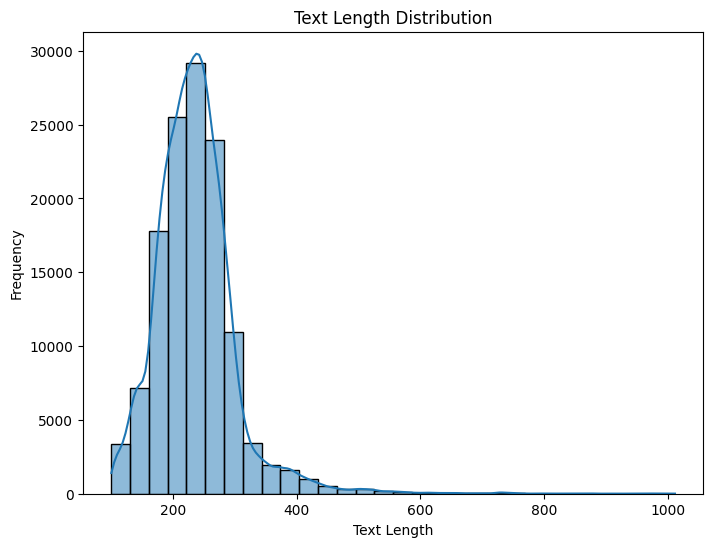

In [20]:
# Data Visualization
# Text Length Distribution Plot

plt.figure(figsize=(8, 6))
sns.histplot(df['Text'].apply(len), bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

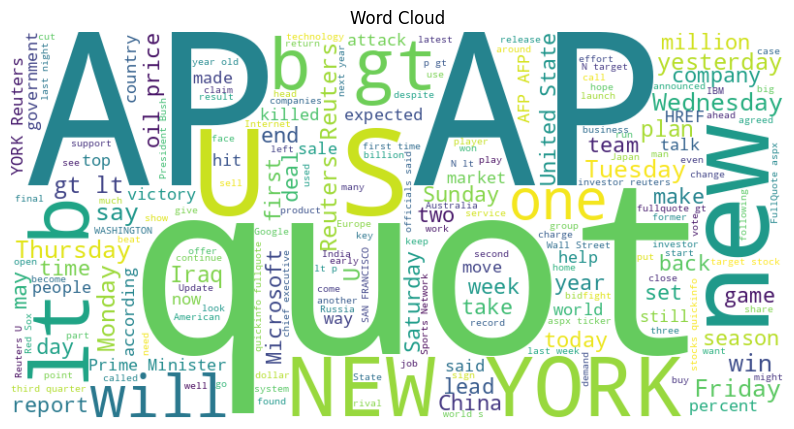

In [21]:
# Most Frequent Words

from wordcloud import WordCloud

# Combining all text into a single string
text_combined = ' '.join(df['Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

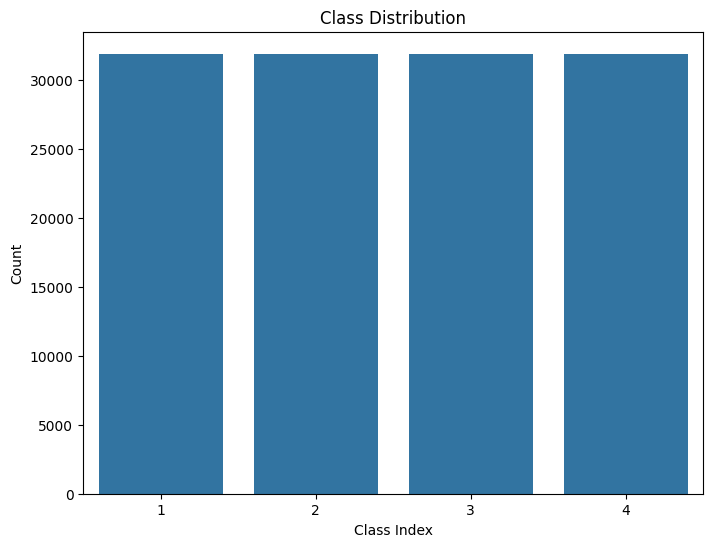

In [22]:
# Class distribution plot

plt.figure(figsize=(8, 6))
sns.countplot(x='Index', data=df)
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.show()

In [23]:
# Function for tokenization

def tokenization(text):
    text = text.lower().strip()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    return filtered_tokens

In [24]:
# Defining Language

stop_words = set(stopwords.words('english'))

In [25]:
# Train test validation split of data

train_validation, test = train_test_split(df, test_size=0.2, random_state=42)
train, validation = train_test_split(train_validation, test_size=0.125, random_state=42)

In [26]:
# Applying test cleaning and filtering tokens

train['Tokens'] = train['Text'].apply(tokenization)
validation['Tokens'] = validation['Text'].apply(tokenization)
test['Tokens'] = test['Text'].apply(tokenization)

In [27]:
tokens_all = [token for sublist in train['Tokens'] for token in sublist]
vocab = {word: i+1 for i, (word, _) in enumerate(Counter(tokens_all).most_common())}
vocab['<pad>'] = 0

In [28]:
# Defining function for encoding tokens

def encode(tokens):
    return [vocab.get(token, 0) for token in tokens]

In [29]:
# Encoding the train, validation and test datasets

train['Encoded'] = train['Tokens'].apply(encode)
validation['Encoded'] = validation['Tokens'].apply(encode)
test['Encoded'] = test['Tokens'].apply(encode)

In [30]:
# Defining function for data loader

def data_loader(df, batch_size=64):
    sequences = [torch.tensor(s) for s in df['Encoded']]
    labels = torch.tensor(df['Index'].values - 1)
    data = list(zip(sequences, labels))

    def collate_fn(batch):
        texts, labels = zip(*batch)
        texts = pad_sequence(texts, batch_first=True, padding_value=vocab['<pad>'])
        labels = torch.tensor(labels)
        return texts, labels

    return DataLoader(data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [31]:
# Defining batch size, train, validation and test data loaders

batch_size = 64
train_loader = data_loader(train, batch_size)
val_loader = data_loader(validation, batch_size)
test_loader = data_loader(test, batch_size)

In [32]:
# Defining the processor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Baseline Model Architecture

In [36]:
#Base Model

class positional_encoding(nn.Module):
    def __init__(self, d_model, max_len=7000):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

In [37]:
# Defining Transformer class

class transformerModel(nn.Module):
    def __init__(self, vocab_size, num_classes):
        super().__init__()
        self.embed_dim = 256
        self.embedding = nn.Embedding(vocab_size, self.embed_dim)
        self.pos_encoder = positional_encoding(self.embed_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=self.embed_dim, nhead=8, dim_feedforward=512)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=6)
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=self.embed_dim, nhead=8, dim_feedforward=512)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=6)
        self.fc_out = nn.Linear(self.embed_dim, num_classes)

    def forward(self, src):
        src = self.embedding(src) * math.sqrt(self.embed_dim)
        src = self.pos_encoder(src)
        memory = self.transformer_encoder(src)
        output = self.transformer_decoder(src, memory)
        output = output.mean(dim=1)
        output = self.fc_out(output)
        return output

In [38]:
# Instantiating the model

BaseModel1 = transformerModel(vocab_size=len(vocab)+1, num_classes=4).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [39]:
# Defining Optimizer and Loss Function

optimizer = torch.optim.SGD(BaseModel1.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [40]:
# Function for training the model

def training(model, train_loader, optimizer, criterion, device):
    model.train()
    train_losses, train_accuracies = [], []
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(texts)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        _, predicted = torch.max(output, 1)
        accuracy = (predicted == labels).sum().item() / labels.size(0)
        train_accuracies.append(accuracy)

    avg_loss = sum(train_losses) / len(train_losses)
    avg_acc = sum(train_accuracies) / len(train_accuracies)
    return avg_loss, avg_acc

In [41]:
# Function for evaluating the model

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, total_correct, total_count = 0, 0, 0
    all_preds, all_probs, all_labels = [], [], []
    with torch.no_grad():
        for texts, labels in loader:
            texts, labels = texts.to(device), labels.to(device)
            output = model(texts)
            loss = criterion(output, labels)
            total_loss += loss.item()

            _, predicted = torch.max(output, 1)
            probabilities = nn.functional.softmax(output, dim=1)
            total_correct += (predicted == labels).sum().item()
            total_count += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probabilities.cpu().numpy())

    avg_loss = total_loss / len(loader)
    avg_acc = total_correct / total_count
    return avg_loss, avg_acc, all_labels, all_preds, all_probs

In [44]:
# Training Loop

train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
epochs = 10
for epoch in range(epochs):
    BaseModel1.train()
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        output = BaseModel1(texts)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_acc, _, _, _ = evaluate(BaseModel1, train_loader, criterion, device)
    val_loss, val_acc, _, _, _ = evaluate(BaseModel1, val_loader, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch 1: Train Loss: 0.9640, Train Acc: 0.6169, Val Loss: 0.9750, Val Acc: 0.6065
Epoch 2: Train Loss: 0.4266, Train Acc: 0.8526, Val Loss: 0.4614, Val Acc: 0.8379
Epoch 3: Train Loss: 0.3222, Train Acc: 0.8915, Val Loss: 0.3722, Val Acc: 0.8719
Epoch 4: Train Loss: 0.2945, Train Acc: 0.9009, Val Loss: 0.3555, Val Acc: 0.8790
Epoch 5: Train Loss: 0.2657, Train Acc: 0.9120, Val Loss: 0.3332, Val Acc: 0.8899
Epoch 6: Train Loss: 0.2372, Train Acc: 0.9215, Val Loss: 0.3312, Val Acc: 0.8915
Epoch 7: Train Loss: 0.2241, Train Acc: 0.9263, Val Loss: 0.3199, Val Acc: 0.8924
Epoch 8: Train Loss: 0.2023, Train Acc: 0.9329, Val Loss: 0.3177, Val Acc: 0.8931
Epoch 9: Train Loss: 0.1926, Train Acc: 0.9371, Val Loss: 0.3231, Val Acc: 0.8901
Epoch 10: Train Loss: 0.1951, Train Acc: 0.9364, Val Loss: 0.3313, Val Acc: 0.8932


In [43]:
# Function for plotting training losses, training accuracies, validation loss, validation accuracy

def plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

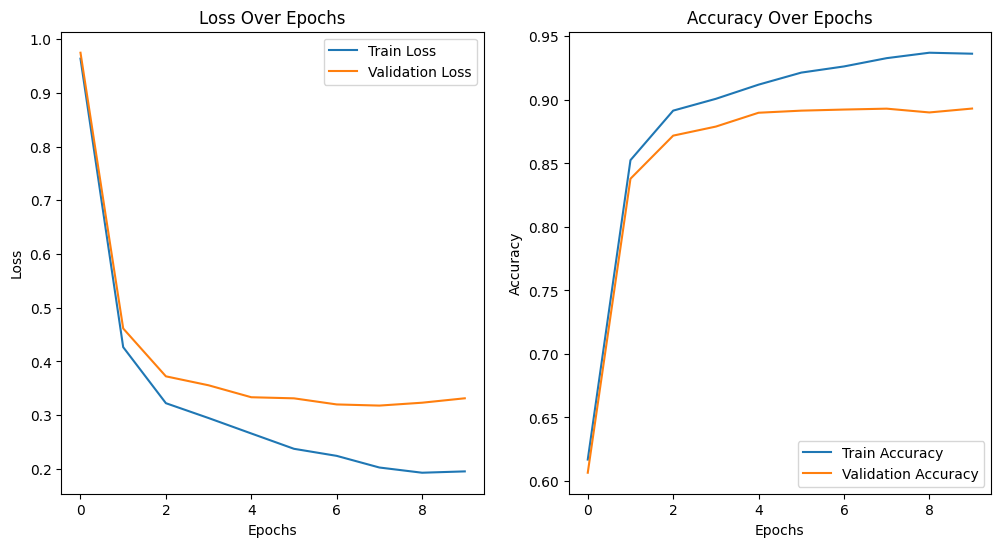

Testing Loss: 0.34, Testing Accuracy: 0.90


In [51]:
# Plotting testing loss and testing accuracy
# Loss over epochs
# Accuracy over epochs

plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)
test_loss, test_acc, test_labels, test_preds, test_probs = evaluate(BaseModel1, test_loader, criterion, device)
print(f"Testing Loss: {test_loss:.2f}, Testing Accuracy: {test_acc:.2f}")

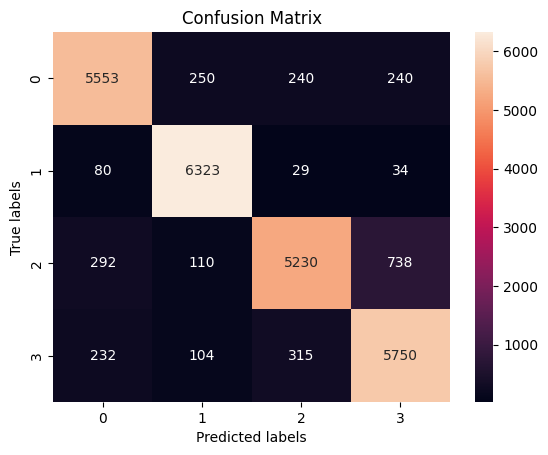

In [50]:
# Confusion Matrix

cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [69]:
# Function for plotting Receiver Operating Characteristic Curve

def plot_roc_curve(labels, scores, num_classes=4):
    labels = label_binarize(labels, classes=[0, 1, 2, 3])
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels[:, i], scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

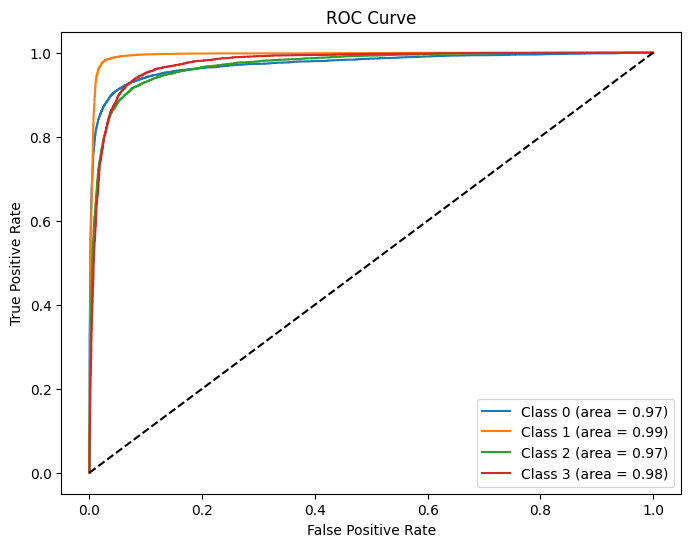

Precision: 0.8959, Recall: 0.8953, F1-Score: 0.8948


In [49]:
# Receiver Operating Characteristic Curve

plot_roc_curve(test_labels, np.array(test_probs), num_classes=4)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

In [70]:
# Dropout Transformer Model

class positional_encoding(nn.Module):
    def __init__(self, d_model, max_len=7000):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

In [71]:
# Second Transformer Model

class transformerModel2(nn.Module):
    def __init__(self, vocab_size, num_classes, dropout_rate=0.1):
        super().__init__()
        self.embed_dim = 256
        self.embedding = nn.Embedding(vocab_size, self.embed_dim)
        self.pos_encoder = positional_encoding(self.embed_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=self.embed_dim, nhead=8, dim_feedforward=512, dropout=dropout_rate)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=6)
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=self.embed_dim, nhead=8, dim_feedforward=512, dropout=dropout_rate)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=6)
        self.fc_out = nn.Linear(self.embed_dim, num_classes)

    def forward(self, src):
        src = self.embedding(src) * math.sqrt(self.embed_dim)
        src = self.pos_encoder(src)
        src = self.dropout(src)
        memory = self.transformer_encoder(src)
        output = self.transformer_decoder(src, memory)
        output = output.mean(dim=1)
        output = self.fc_out(output)
        return output

In [54]:
# Defining processor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [56]:
# Defining second model

modelArchitecture2 = transformerModel2(vocab_size=len(vocab)+1, num_classes=4, dropout_rate=0.1).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [58]:
# Defining optimizer and loss functions

optimizer = torch.optim.SGD(modelArchitecture2.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [61]:
# Training Loop

train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
epochs = 10
for epoch in range(epochs):
    modelArchitecture2.train()
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        output = modelArchitecture2(texts)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_acc, _, _, _ = evaluate(modelArchitecture2, train_loader, criterion, device)
    val_loss, val_acc, _, _, _ = evaluate(modelArchitecture2, val_loader, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch + 1}: Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

Epoch 1: Train Loss: 0.6159, Train Acc: 0.7629, Val Loss: 0.6322, Val Acc: 0.7512
Epoch 2: Train Loss: 0.3620, Train Acc: 0.8790, Val Loss: 0.4073, Val Acc: 0.8676
Epoch 3: Train Loss: 0.3246, Train Acc: 0.8919, Val Loss: 0.3721, Val Acc: 0.8735
Epoch 5: Train Loss: 0.2627, Train Acc: 0.9146, Val Loss: 0.3338, Val Acc: 0.8903
Epoch 6: Train Loss: 0.2461, Train Acc: 0.9173, Val Loss: 0.3360, Val Acc: 0.8869
Epoch 7: Train Loss: 0.2289, Train Acc: 0.9248, Val Loss: 0.3167, Val Acc: 0.8976
Epoch 8: Train Loss: 0.2216, Train Acc: 0.9268, Val Loss: 0.3336, Val Acc: 0.8947
Epoch 9: Train Loss: 0.2092, Train Acc: 0.9291, Val Loss: 0.3198, Val Acc: 0.8953
Epoch 10: Train Loss: 0.1983, Train Acc: 0.9336, Val Loss: 0.3245, Val Acc: 0.8937


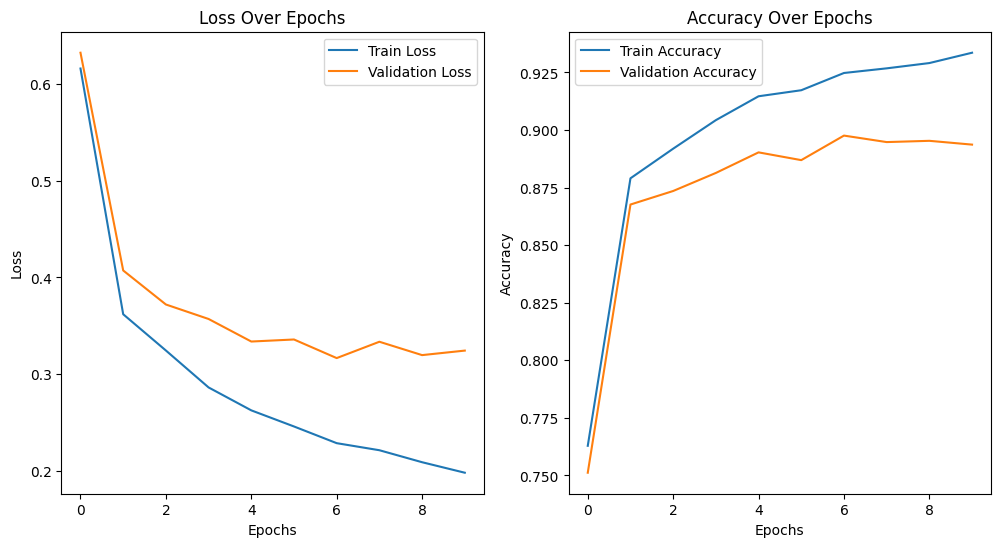

Testing Loss: 0.330, Testing Accuracy: 0.894


In [62]:
# Plotting testing loss and testing accuracy
# Loss over epochs
# Accuracy over epochs

plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)
test_loss, test_acc, test_labels, test_preds, test_probs = evaluate(modelArchitecture2, test_loader, criterion, device)
print(f"Testing Loss: {test_loss:.3f}, Testing Accuracy: {test_acc:.3f}")

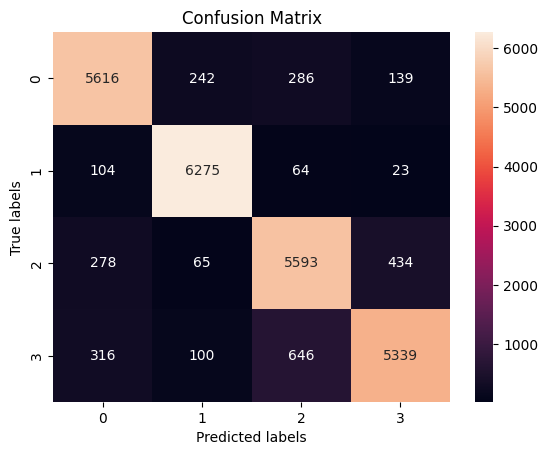

Precision: 0.8942, Recall: 0.8941, F1-Score: 0.8937


In [65]:
# Confusion Matrix

cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

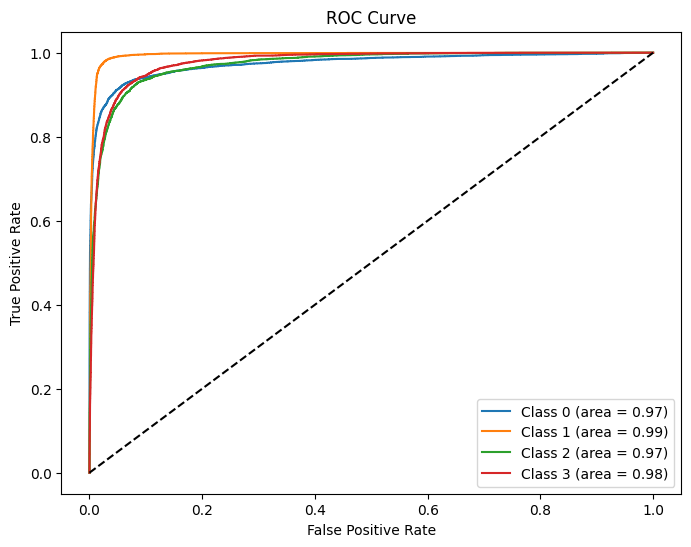

In [64]:
# Receiver Operating Characteristic Curve

plot_roc_curve(test_labels, np.array(test_probs), num_classes=4)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro')

In [66]:
#Early Stopping

modelEarlyStopping = transformerModel(vocab_size=len(vocab)+1, num_classes=4).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [67]:
# Defining Optimizer

optimizer = torch.optim.SGD(modelEarlyStopping.parameters(), lr=0.01, momentum=0.9)

In [68]:
# Training Loop

train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
no_imp = 0
pat = 3
best_loss = float('inf')
epochs = 10
for epoch in range(epochs):
    modelEarlyStopping.train()
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        output = modelEarlyStopping(texts)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_acc, _, _, _ = evaluate(modelEarlyStopping, train_loader, criterion, device)
    val_loss, val_acc, _, _, _ = evaluate(modelEarlyStopping, val_loader, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch + 1}: Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
    if val_loss < best_loss:
        best_loss = val_loss
        no_imp = 0
    else:
        no_imp += 1
        if no_imp >= pat:
            print("Early stopping")
            break

Epoch 1: Training Loss: 1.0107, Training Accuracy: 0.6019, Validation Loss: 1.0157, Validation Accuracy: 0.6034
Epoch 2: Training Loss: 0.3954, Training Accuracy: 0.8652, Validation Loss: 0.4305, Validation Accuracy: 0.8500
Epoch 3: Training Loss: 0.3157, Training Accuracy: 0.8962, Validation Loss: 0.3643, Validation Accuracy: 0.8755
Epoch 4: Training Loss: 0.2778, Training Accuracy: 0.9091, Validation Loss: 0.3422, Validation Accuracy: 0.8865
Epoch 5: Training Loss: 0.2553, Training Accuracy: 0.9165, Validation Loss: 0.3295, Validation Accuracy: 0.8893
Epoch 6: Training Loss: 0.2314, Training Accuracy: 0.9249, Validation Loss: 0.3189, Validation Accuracy: 0.8960
Epoch 7: Training Loss: 0.2186, Training Accuracy: 0.9278, Validation Loss: 0.3277, Validation Accuracy: 0.8935
Epoch 8: Training Loss: 0.1993, Training Accuracy: 0.9340, Validation Loss: 0.3210, Validation Accuracy: 0.8938
Epoch 9: Training Loss: 0.1947, Training Accuracy: 0.9375, Validation Loss: 0.3108, Validation Accuracy:

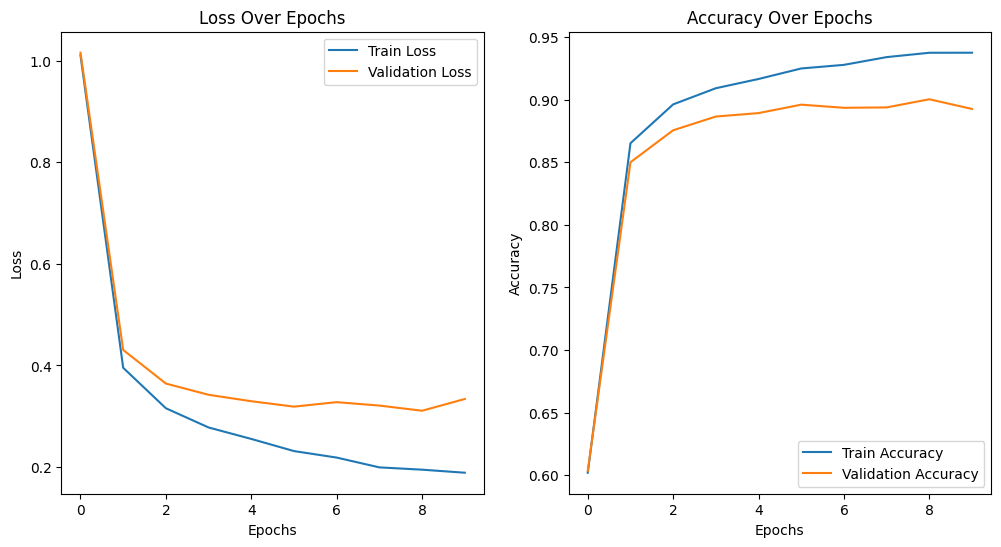

Test Loss: 0.3379, Test Accuracy: 0.8937


In [72]:
# Plotting testing loss and testing accuracy
# Loss over epochs
# Accuracy over epochs

plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)
test_loss, test_acc, test_labels, test_preds, test_probs = evaluate(modelEarlyStopping, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

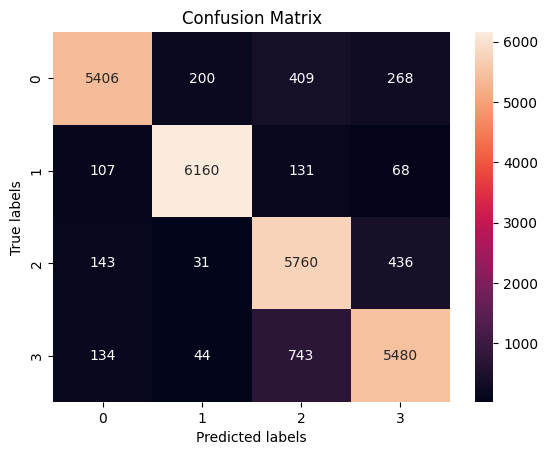

Precision: 0.894, Recall: 0.894, F1-Score: 0.894


In [73]:
# Confusion Matrix

cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

print(f'Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}')

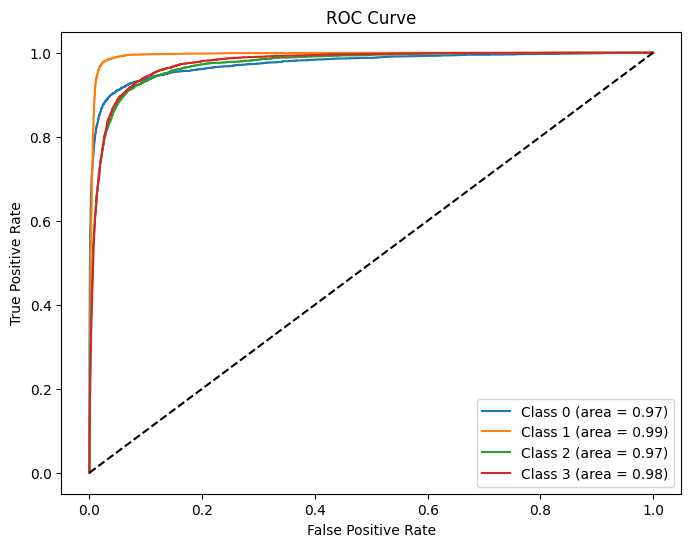

In [74]:
# Receiver Operating Characteristic Curve

plot_roc_curve(test_labels, np.array(test_probs), num_classes=4)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro')

In [75]:
#R2 Regularization

modelArchitecture3 = transformerModel(vocab_size=len(vocab)+1, num_classes=4).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [76]:
# Defining Optimizer

optimizer = torch.optim.SGD(modelArchitecture3.parameters(), lr=0.01, momentum=0.9,weight_decay=0.001)

In [77]:
# Training Loop
train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []
epochs = 10
for epoch in range(epochs):
    modelArchitecture3.train()
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        output = modelArchitecture3(texts)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_acc, _, _, _ = evaluate(modelArchitecture3, train_loader, criterion, device)
    val_loss, val_acc, _, _, _ = evaluate(modelArchitecture3, val_loader, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch + 1}: Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

Epoch 1: Training Loss: 0.7768, Training Accuracy: 0.7027, Validation Loss: 0.7803, Validation Accuracy: 0.7018
Epoch 2: Training Loss: 0.3696, Training Accuracy: 0.8791, Validation Loss: 0.4021, Validation Accuracy: 0.8685
Epoch 3: Training Loss: 0.3065, Training Accuracy: 0.9016, Validation Loss: 0.3590, Validation Accuracy: 0.8863
Epoch 4: Training Loss: 0.2688, Training Accuracy: 0.9134, Validation Loss: 0.3411, Validation Accuracy: 0.8846
Epoch 5: Training Loss: 0.2586, Training Accuracy: 0.9203, Validation Loss: 0.3334, Validation Accuracy: 0.8940
Epoch 6: Training Loss: 0.2430, Training Accuracy: 0.9221, Validation Loss: 0.3339, Validation Accuracy: 0.8911
Epoch 7: Training Loss: 0.2519, Training Accuracy: 0.9174, Validation Loss: 0.3412, Validation Accuracy: 0.8854
Epoch 8: Training Loss: 0.2304, Training Accuracy: 0.9244, Validation Loss: 0.3429, Validation Accuracy: 0.8878
Epoch 9: Training Loss: 0.2305, Training Accuracy: 0.9237, Validation Loss: 0.3457, Validation Accuracy:

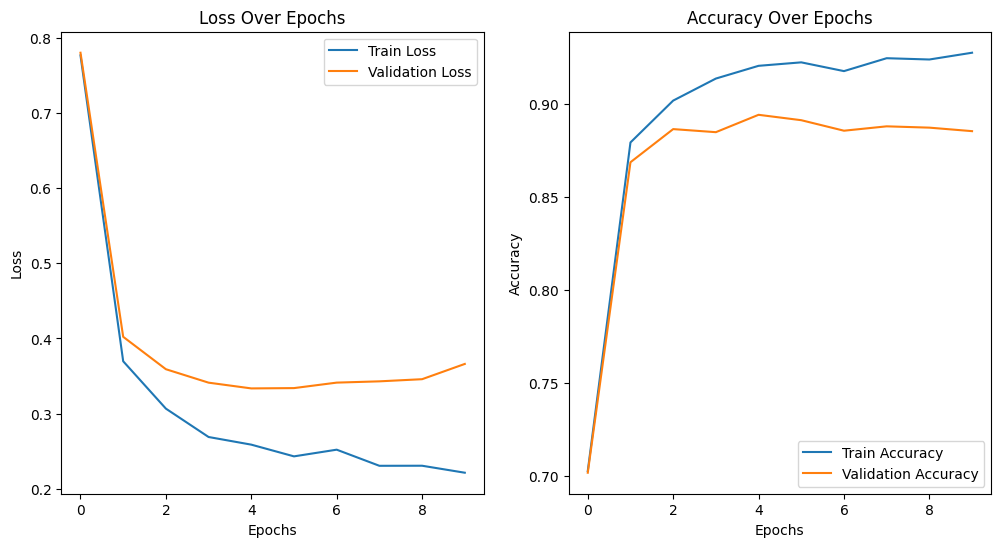

Final Test Loss: 0.369, Test Accuracy: 0.883


In [78]:
# Plotting testing loss and testing accuracy
# Loss over epochs
# Accuracy over epochs

plot_metrics(train_losses, train_accuracies, val_losses, val_accuracies)
test_loss, test_acc, test_labels, test_preds, test_probs = evaluate(modelArchitecture3, test_loader, criterion, device)
print(f"Final Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}")

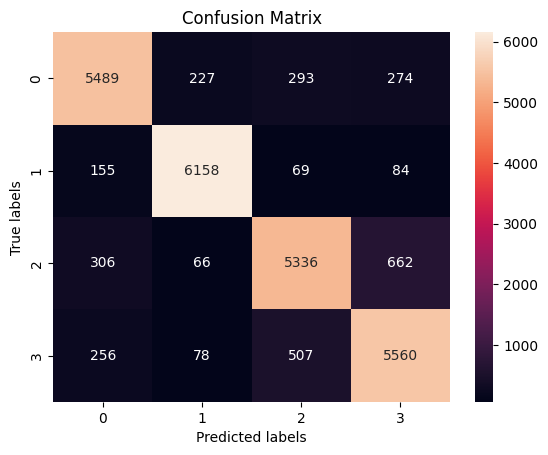

Precision: 0.8963, Recall: 0.8934, F1-Score: 0.8939


In [80]:
# Confusion Matrix

cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

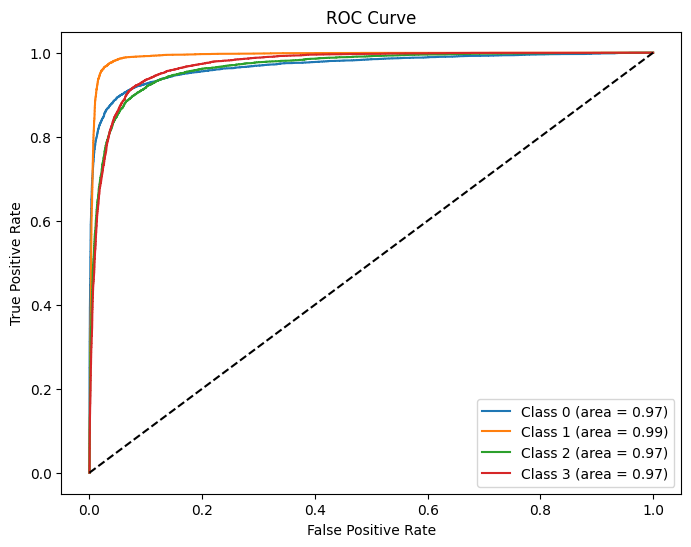

In [81]:
# Receiver Operating Characteristic Curve

plot_roc_curve(test_labels, np.array(test_probs), num_classes=4)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='macro')

In [83]:
torch.save(BaseModel1.state_dict(), 'bhavesht_assignment2_part_4.h5')